## เตรียมข้อมูลก่อนนำไปวิเคราะห์

### แบบบัญชีรายการที่ดิน เทศบาลเมืองลำพูน อำเภอ เมืองลำพูน จังหวัด ลำพูน

#### เปิดไฟล์และทำความสะอาดข้อมูล

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# เปิดไฟล์ csv
df_66 = pd.read_csv("dataset/2566.csv")

# ลบลูกน้ำออก
df_66 = df_66.replace(',','', regex=True)

# เติมค่าว่างตั้งแต่หลักที่ 8 ให้เป็น 0
df_66.iloc[:, 8:] = df_66.iloc[:, 8:].fillna("0")  

# เติมค่าว่างให้เป็น -
df_66 = df_66.fillna("-")  

# แปลงประเภทของข้อมูลให้เป็นตัวเลข
df_66.iloc[:, 8:] = df_66.iloc[:, 8:].astype(float) 

In [3]:
# แสดงข้อมูล
df_66

,order,type,document_number,parcel_number,sub_district_no,location_id,rai,ngan,tarang_wa,usage_agriculture,usage_living,usage_other,usage_none,usage_misc
0,1,โฉนด,1457,1309,1442.0,01A001,2.0,3.0,22.7,0.0,1122.7,0.0,0.0,1.0
1,2,โฉนด,1181,1384,1441.0,01A002,1.0,0.0,38.7,0.0,438.7,0.0,0.0,0.0
2,3,โฉนด,1755,1386,1439.0,01A003,0.0,0.0,75.5,0.0,75.5,0.0,0.0,0.0
3,4,โฉนด,85625,37,4752.0,01A003/001,0.0,0.0,75.5,0.0,75.5,0.0,0.0,0.0
4,5,โฉนด,85626,38,4753.0,01A003/002,0.0,0.0,75.5,0.0,75.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6485,6592,โฉนด,29141,2286,3562.0,06L022,0.0,3.0,77.8,0.0,377.8,0.0,0.0,0.0
6486,6593,โฉนด,29140,2478,3563.0,06L023,0.0,3.0,48.0,0.0,348.0,0.0,0.0,0.0
6487,6594,โฉนด,98537,219,4945.0,06L023/001,0.0,2.0,0.0,0.0,180.0,20.0,0.0,0.0
6488,6595,โฉนด,29139,2476,3574.0,06L024,0.0,3.0,81.4,0.0,0.0,0.0,381.4,0.0


#### จำแนกลักษณะการทำประโยชน์

In [4]:
# สร้างคอลัมม์ใหม่
df_66["type_of_usage"] = pd.Series([float('NaN')] * len(df_66))

In [5]:
# จำแนกลักษณ์การทำประโยชน์จากพื้นที่ใช้งาน ('พื้นที่ประกอบเกษตรกรรม', 'พื้นที่อยู่อาศัย', 'พื้นที่อื่น ๆ', 'พื้นที่ว่างเปล่า', 'พื้นที่ใช้ประโยชน์หลายประเภท' และ 'ไม่ทราบลักษณะการใช้')
df_66[df_66["usage_agriculture"] > 0] = df_66[df_66["usage_agriculture"] > 0].fillna("agriculture")
df_66[df_66["usage_living"] > 0] = df_66[df_66["usage_living"] > 0].fillna("living")
df_66[df_66["usage_other"] > 0] = df_66[df_66["usage_other"] > 0].fillna("other")
df_66[df_66["usage_none"] > 0] = df_66[df_66["usage_none"] > 0].fillna("wasteland")
df_66[df_66["usage_misc"] > 0] = df_66[df_66["usage_misc"] > 0].fillna("misc")        
df_66["type_of_usage"] = df_66["type_of_usage"].fillna("unknown")

In [6]:
# แสดงข้อมูลโดยจำแนกออกมาแค่ รหัสแปลงที่ดิน และ ลักษณะการใช้ประโยชน์
# พื้นที่ประกอบเกษตรกรรม : agriculture, พื้นที่อยู่อาศัย : living, พื้นที่อื่น ๆ : other, 
# พื้นที่ว่างเปล่า : wasteland, พื้นที่ใช้ประโยชน์หลายประเภท : misc และ ไม่ทราบลักษณะการใช้ : unknown

df_66[ ['location_id', 'type_of_usage'] ]

,location_id,type_of_usage
0,01A001,living
1,01A002,living
2,01A003,living
3,01A003/001,living
4,01A003/002,living
...,...,...
6485,06L022,living
6486,06L023,living
6487,06L023/001,living
6488,06L024,wasteland


## วิเคราะห์ข้อมูลและรายงานผล

#### จากแบบบัญชีรายการที่ดิน เทศบาลเมืองลำพูน อำเภอเมือง จังหวัดลำพูน ในปี 2566 มีที่ดิน 6490 ที่

In [7]:
land = len(df_66) 
land

6490

### ที่ดินสามารถจำแนกจากลักษณะการทำประโยชน์ 6 รายการ ได้แก่ ประกอบการเกษตร, ใช้เพื่ออยู่อาศัย, อื่น ๆ , ไม่ใช้ประโยชน์, ใช้ประโยชน์หลายประเภท และ ไม่ทราบลักษณะการใช้

#### มีพื้นที่ประกอบเกษตรกรรม 569 พื้นที่ คิดเป็น 8.7673 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [8]:
(len(df_66[df_66["type_of_usage"] == "agriculture"]) / land) * 100  

8.7673343605547

#### มีพื้นที่อยู่อาศัย 4072 พื้นที่ คิดเป็น 62.7427 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน 

In [9]:
len(df_66[df_66["type_of_usage"] == "living"]) / land * 100

62.74268104776579

#### มีพื้นที่อื่น ๆ 574 พื้นที่ คิดเป็น 8.8444 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [10]:
len(df_66[df_66["type_of_usage"] == "other"]) / land * 100

8.844375963020031

#### มีพื้นที่ว่างเปล่า/ไม่ทำประโยชน์ 658 พื้นที่ คิดเป็น 10.1387 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [11]:
len(df_66[df_66["type_of_usage"] == "wasteland"]) / land * 100

10.138674884437595

#### และมีพื้นที่ใช้ประโยชน์หลายประเภท 588 พื้นที่ คิดเป็น 9.0601 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [12]:
len(df_66[df_66["type_of_usage"] == "misc"]) / land * 100

9.060092449922958

#### และมีพื้นที่ไม่ทราบลักษณะการใช้ 29 พื้นที่ คิดเป็น 0.4468 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [13]:
len(df_66[df_66["type_of_usage"] == "unknown"]) / land * 100

0.44684129429892144

#### จากข้อมูลข้างต้น สามารถนำมาแสดงเป็นแผนภาพได้ดังนี้

findfont: Font family ['Angsana New'] not found. Falling back to DejaVu Sans.
C:\Users\Ote\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ote\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ote\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ote\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ote\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from current f

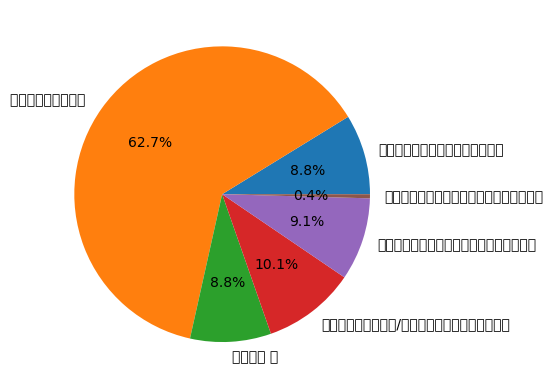

In [14]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams["font.family"] = "Angsana New"
plt.rcParams["font.serif"] = "Angsana New"

# สร้างกราฟ
data = [ len(df_66[df_66["type_of_usage"] == "agriculture"]),
         len(df_66[df_66["type_of_usage"] == "living"]), 
         len(df_66[df_66["type_of_usage"] == "other"]), 
         len(df_66[df_66["type_of_usage"] == "wasteland"]), 
         len(df_66[df_66["type_of_usage"] == "misc"]),
         len(df_66[df_66["type_of_usage"] == "unknown"])
       ]

labels = ['ประกอบเกษตรกรรม','อยู่อาศัย ','อื่น ๆ','ว่างเปล่า/ไม่ทำประโยชน์','ใช้ประโยชน์หลากหลาย', 'ไม่ทราบลักษณะการใช้'] 

plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.show()

findfont: Font family ['Angsana New'] not found. Falling back to DejaVu Sans.
C:\Users\Ote\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ote\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ote\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ote\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ote\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from curr

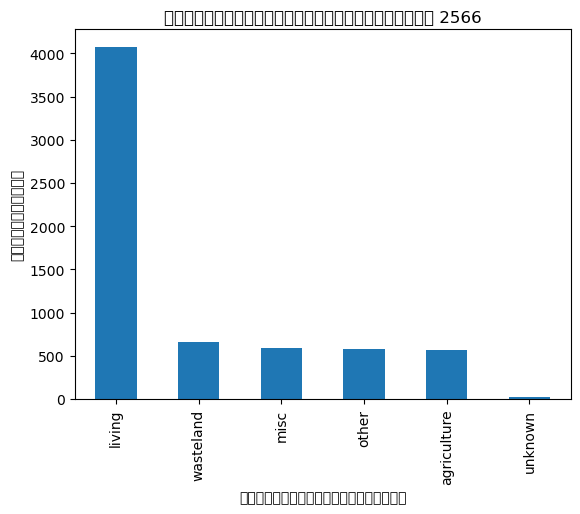

In [15]:
value_counts = df_66["type_of_usage"].value_counts()
value_counts.plot(kind="bar")
plt.title("จำนวนลักษณะการใช้ประโยชน์ปี 2566")
plt.xlabel("ลักษณะการใช้ประโยชน์")
plt.ylabel("จำนวนที่ดิน")
plt.show()

##  ข้อมูลเฉพาะลักษณะการใช้ประโยชน์แบบประกอบเกษตรกรรม

#### ดูข้อมูลทั้งหมด

In [16]:
df_66["type"] = df_66["type"].replace("-", "ไม่ระบุ")
agricultrue_land = df_66[df_66["type_of_usage"] == "agriculture"]
agricultrue_land

,order,type,document_number,parcel_number,sub_district_no,location_id,rai,ngan,tarang_wa,usage_agriculture,usage_living,usage_other,usage_none,usage_misc,type_of_usage
6,7,โฉนด,1758,1389,1438.0,01A005,2.0,1.0,8.7,908.7,0.0,0.0,0.0,0.0,agriculture
44,45,โฉนด,146920,1777,6581.0,01A027/001,0.0,0.0,35.9,35.9,0.0,0.0,0.0,0.0,agriculture
71,73,โฉนด,72196,13,4403.0,01A044/002,0.0,0.0,84.1,84.1,0.0,0.0,0.0,0.0,agriculture
96,98,โฉนด,112915,26,5057.0,01B010/002,0.0,0.0,6.1,6.1,0.0,0.0,0.0,0.0,agriculture
121,123,โฉนด,2313,292,1397.0,01B033,0.0,0.0,67.1,67.1,0.0,0.0,0.0,0.0,agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6465,6572,โฉนด,27110,112,727.0,06K076,0.0,1.0,0.7,100.7,0.0,0.0,0.0,0.0,agriculture
6466,6573,โฉนด,27599,113,791.0,06K077,0.0,0.0,50.4,50.4,0.0,0.0,0.0,0.0,agriculture
6467,6574,โฉนด,27109,114,726.0,06K078,0.0,0.0,50.3,50.3,0.0,0.0,0.0,0.0,agriculture
6474,6581,โฉนด,121202,352,8415.0,06K085,0.0,0.0,65.8,65.8,0.0,0.0,0.0,0.0,agriculture


#### จำนวนที่ดินที่ประกอบเกษตรกรรม

In [17]:
len(agricultrue_land) # 569 ที่

569

#### ดูข้อมูลทั้งหมดจำแนกแยกด้วยประเภท

In [18]:
df_66.groupby('type').size()

type
ที่ราชพัสดุ      13
น.ส.3            13
น.ส.ล.            4
โฉนด           6381
ไม่ระบุ          79
dtype: int64

In [19]:
agricultrue_land.groupby('type').size()

# น.ส.ล. 2 ที่
# โฉนด 567 ที่

type
น.ส.ล.      2
โฉนด      567
dtype: int64

#### สามารถดาวน์โหลดไฟล์ csv โดยการนำ '#' ออกและกดรันโปรแกรม

In [20]:
#df_66.to_csv('target/data2566.csv', index=False)
df_66

,order,type,document_number,parcel_number,sub_district_no,location_id,rai,ngan,tarang_wa,usage_agriculture,usage_living,usage_other,usage_none,usage_misc,type_of_usage
0,1,โฉนด,1457,1309,1442.0,01A001,2.0,3.0,22.7,0.0,1122.7,0.0,0.0,1.0,living
1,2,โฉนด,1181,1384,1441.0,01A002,1.0,0.0,38.7,0.0,438.7,0.0,0.0,0.0,living
2,3,โฉนด,1755,1386,1439.0,01A003,0.0,0.0,75.5,0.0,75.5,0.0,0.0,0.0,living
3,4,โฉนด,85625,37,4752.0,01A003/001,0.0,0.0,75.5,0.0,75.5,0.0,0.0,0.0,living
4,5,โฉนด,85626,38,4753.0,01A003/002,0.0,0.0,75.5,0.0,75.5,0.0,0.0,0.0,living
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6485,6592,โฉนด,29141,2286,3562.0,06L022,0.0,3.0,77.8,0.0,377.8,0.0,0.0,0.0,living
6486,6593,โฉนด,29140,2478,3563.0,06L023,0.0,3.0,48.0,0.0,348.0,0.0,0.0,0.0,living
6487,6594,โฉนด,98537,219,4945.0,06L023/001,0.0,2.0,0.0,0.0,180.0,20.0,0.0,0.0,living
6488,6595,โฉนด,29139,2476,3574.0,06L024,0.0,3.0,81.4,0.0,0.0,0.0,381.4,0.0,wasteland


#### สามารถดาวน์โหลดไฟล์ csv (เฉพาะพื้นที่เกษตรกรรม) โดยการนำ '#' ออกและกดรันโปรแกรม

In [21]:
df_66.iloc[:, 8:] = df_66.iloc[:, 8:].replace(0,'-')
df_66.iloc[:, -1] = df_66.iloc[:, -1].replace("agriculture", "ประกอบเกษตรกรรม")
df_66.iloc[:, -1] = df_66.iloc[:, -1].replace("living", "อยู่อาศัย")
df_66.iloc[:, -1] = df_66.iloc[:, -1].replace("other", "อื่น ๆ")
df_66.iloc[:, -1] = df_66.iloc[:, -1].replace("wasteland", "ว่างเปล่า/ไม่ทำประโยชน์")
df_66.iloc[:, -1] = df_66.iloc[:, -1].replace("misc", "ใช้ประโยชน์หลากหลาย")
df_66.iloc[:, -1] = df_66.iloc[:, -1].replace("unknown", "ไม่ทราบลักษณะการใช้ ")

In [22]:
df_66 = df_66.rename(columns={
                    "order": "ที่", 
                    "type": "ประเภทที่ดิน", 
                    "document_number": "เลขที่เอกสารสิทธิ์",
                    "parcel_number": "เลขที่ดิน",
                    "sub_district_no" : "หน้าสำรวจ",
                    "location_id" : "รหัสแปลงที่ดิน",
                    "rai" : "ไร่",
                    "ngan" : "งาน",
                    "tarang_wa" : "ตร.ว.",
                    "usage_agriculture" : "ประกอบเกษตรกรรม (ตร.ว.)",
                    "usage_living" : "อยู่อาศัย (ตร.ว.)",
                    "usage_other" : "อื่น ๆ (ตร.ว.)",
                    "usage_none" : "ว่างเปล่า/ไม่ทำประโยชน์ (ตร.ว.)",
                    "usage_misc" : "ใช้ประโยชน์หลากหลาย (ตร.ว.)",
                    "type_of_usage" : "ลักษณะการทำประโยชน์"
                    }, errors="raise")

In [23]:
# df_66[df_66["ลักษณะการทำประโยชน์"] == "ประกอบเกษตรกรรม"].to_csv('../result/พื้นที่ประกอบเกษตรกรรม/2566/พื้นที่ประกอบเกษตรกรรม2566.csv', index=False)

#### สามารถดาวน์โหลดไฟล์ excel โดยการนำ '#' ออกและกดรันโปรแกรม

In [24]:
# df_66[df_66["ลักษณะการทำประโยชน์"] == "ประกอบเกษตรกรรม"].to_excel('../result/พื้นที่ประกอบเกษตรกรรม/2566/พื้นที่ประกอบเกษตรกรรม2566.xlsx', index=False)

---------------

C:\Users\Ote\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ote\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ote\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ote\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3651 (\N{THAI CHARACTER SARA AI MAIMUAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ote\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3594 (\N{THAI CHARACTER CHO CHANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ote\anac

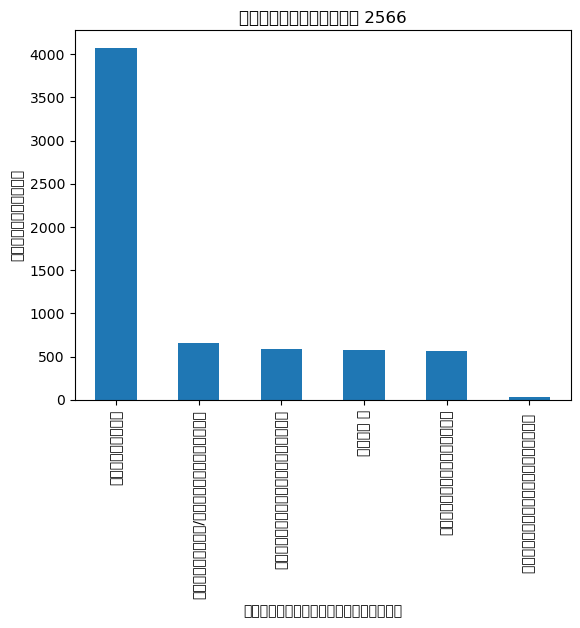

In [25]:
value_counts = df_66["ลักษณะการทำประโยชน์"].value_counts() 
value_counts.plot(kind="bar")
plt.title("การใช้ที่ดิน 2566")
plt.xlabel("ลักษณะการทำประโยชน์")
plt.ylabel("จำนวนที่ดิน")
plt.show()